In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

texts = ["You are the Best"
        ,"You are the Nice"]

# text tokenize
tokenizer = Tokenizer(num_words = 10, oov_token = "<OOV>") 
# 단어의 최대 개수 지정
# 임의의 단어로 "<OOV>"를 지정하면 기존 단어에 존재하지 않는 단어 입력시 <OOV>의 자리를 대체
tokenizer.fit_on_texts(texts)
print(tokenizer.word_index)
# token -> sequence 정수 인덱스 형태로 변환
sequences = tokenizer.texts_to_sequences(texts)
#texts_to_sequence는 각 토큰에 지정된 인덱스를 기준으로 주어진 문장을 인덱스로 변환
print(sequences)
# encoding to binary 
binary_results = tokenizer.sequences_to_matrix(sequences, mode = "binary")
print(binary_results)

# encoding to one-hot 
one_hot_results = to_categorical(sequences)
print(one_hot_results)

test_text = ["You are the One"]
test_seq = tokenizer.texts_to_sequences(test_text)
print(test_seq)
print(tokenizer.word_index)

{'<OOV>': 1, 'you': 2, 'are': 3, 'the': 4, 'best': 5, 'nice': 6}
[[2, 3, 4, 5], [2, 3, 4, 6]]
[[0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 1. 0. 0. 0.]]
[[[0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0.]]

 [[0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1.]]]
[[2, 3, 4, 1]]
{'<OOV>': 1, 'you': 2, 'are': 3, 'the': 4, 'best': 5, 'nice': 6}


In [2]:
# Data Load
from tensorflow.keras.datasets import imdb

num_words = 10000
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=num_words)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
print(x_train[0])
print(y_train[0])

(25000,) (25000,)
(25000,) (25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [3]:
# 높은 빈도의 단어 확인
imdb_get_word_index={}

for key, value in imdb.get_word_index().items():
    imdb_get_word_index[value] = key

for i in range(1,4):
    print("{}순위 단어 : {}".format(i,imdb_get_word_index[i]))


1순위 단어 : the
2순위 단어 : and
3순위 단어 : a


In [4]:
#Data Padding 
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500
print("before padding : {}".format(len(x_train[0])))

pad_x_train = pad_sequences(x_train, maxlen = max_len, padding="pre")
pad_x_test = pad_sequences(x_test,maxlen=max_len, padding="pre")

print("after padding : {}".format(len(pad_x_train[0])))

before padding : 218
after padding : 500


In [6]:
#Create Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

model = Sequential()
#Embedding layer 는 모델의 제일 첫번째 층으로만 사용 가능
model.add(Embedding(input_dim=num_words,output_dim=32,input_length = max_len))
#Flatten layer를 사용하기 위해 input length를 전달 -> 출력 크기를 지정
#input length는 다음 layer가 순환 신경망일 경우엔 사용 x 
model.add(Flatten())
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer ="adam",
             loss="binary_crossentropy",
             metrics = ["acc"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           320000    
_________________________________________________________________
flatten (Flatten)            (None, 16000)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 16001     
Total params: 336,001
Trainable params: 336,001
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(pad_x_train,y_train,
                   batch_size=32,
                   epochs= 30,
                   validation_split=0.2)

Epoch 1/30
625/625 [==============================] - 3s 5ms/step - loss: 0.4527 - acc: 0.7793 - val_loss: 0.2981 - val_acc: 0.8780
Epoch 2/30
625/625 [==============================] - 3s 5ms/step - loss: 0.1995 - acc: 0.9256 - val_loss: 0.2757 - val_acc: 0.8888
Epoch 3/30
625/625 [==============================] - 3s 5ms/step - loss: 0.1063 - acc: 0.9691 - val_loss: 0.2888 - val_acc: 0.8904
Epoch 4/30
625/625 [==============================] - 3s 5ms/step - loss: 0.0509 - acc: 0.9909 - val_loss: 0.3096 - val_acc: 0.8886
Epoch 5/30
625/625 [==============================] - 3s 5ms/step - loss: 0.0236 - acc: 0.9980 - val_loss: 0.3372 - val_acc: 0.8858
Epoch 6/30
625/625 [==============================] - 3s 5ms/step - loss: 0.0118 - acc: 0.9995 - val_loss: 0.3600 - val_acc: 0.8848
Epoch 7/30
625/625 [==============================] - 3s 5ms/step - loss: 0.0064 - acc: 0.9998 - val_loss: 0.3837 - val_acc: 0.8826
Epoch 8/30
625/625 [==============================] - 3s 5ms/step - loss: 0.

In [11]:
model.evaluate(pad_x_test,y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.7993 - acc: 0.8721


[0.7993217706680298, 0.8720800280570984]

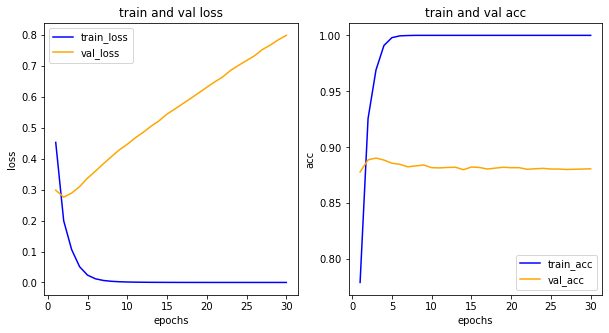

In [13]:
import matplotlib.pyplot as plt

his_dict = history.history 
loss = his_dict["loss"]
val_loss = his_dict["val_loss"]

epochs = range(1,len(loss)+1)
fig = plt.figure(figsize = (10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs,loss,color="blue",label="train_loss")
ax1.plot(epochs,val_loss,color="orange",label="val_loss")
ax1.set_title("train and val loss")
ax1.set_xlabel("epochs")
ax1.set_ylabel("loss")
ax1.legend()

acc = his_dict["acc"]
val_acc = his_dict["val_acc"]

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs,acc,color="blue",label="train_acc")
ax2.plot(epochs,val_acc,color="orange",label="val_acc")
ax2.set_title("train and val acc")
ax2.set_xlabel("epochs")
ax2.set_ylabel("acc")
ax2.legend()
plt.show()
